# Support Vector Machines

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import data_processing
import feature_extraction

In [2]:
df = data_processing.read_all_users('geolife_trajectories')
df = data_processing.process_classes(df)
df = data_processing.drop_unlabelled(df)

[1/182] processing user 135
[2/182] processing user 132
[3/182] processing user 104
[4/182] processing user 103
[5/182] processing user 168
[6/182] processing user 157
[7/182] processing user 150
[8/182] processing user 159
[9/182] processing user 166
[10/182] processing user 161
[11/182] processing user 102
[12/182] processing user 105
[13/182] processing user 133
[14/182] processing user 134
[15/182] processing user 160
[16/182] processing user 158
[17/182] processing user 167
[18/182] processing user 151
[19/182] processing user 169
[20/182] processing user 156
[21/182] processing user 024
[22/182] processing user 023
[23/182] processing user 015
[24/182] processing user 012
[25/182] processing user 079
[26/182] processing user 046
[27/182] processing user 041
[28/182] processing user 048
[29/182] processing user 077
[30/182] processing user 083
[31/182] processing user 084
[32/182] processing user 070
[33/182] processing user 013
[34/182] processing user 014
[35/182] processing use

In [3]:
df

,lat,lon,alt,elapsed time,time,trajectory,label,user
134,39.962098,116.301595,0.000000,39535.364236,2008-03-28 08:44:30,20080328075913.plt,bus,104
135,39.948270,116.303298,0.000000,39535.367014,2008-03-28 08:48:30,20080328075913.plt,bus,104
136,39.948220,116.303337,0.000000,39535.367049,2008-03-28 08:48:33,20080328075913.plt,bus,104
137,39.948120,116.303378,0.000000,39535.367118,2008-03-28 08:48:39,20080328075913.plt,bus,104
138,39.948110,116.303418,0.000000,39535.367153,2008-03-28 08:48:42,20080328075913.plt,bus,104
...,...,...,...,...,...,...,...,...
633,39.892109,116.328963,149.654629,40608.471296,2011-03-06 11:18:40,20110306101335.plt,walk,147
634,39.892085,116.328959,149.924311,40608.471354,2011-03-06 11:18:45,20110306101335.plt,walk,147
635,39.892074,116.328959,149.293596,40608.471412,2011-03-06 11:18:50,20110306101335.plt,walk,147
636,39.892064,116.328959,149.058396,40608.471470,2011-03-06 11:18:55,20110306101335.plt,walk,147


In [4]:
df = data_processing.create_segments(df)

In [5]:
df = data_processing.calculations(df)

In [6]:
df = data_processing.filter(df)

In [7]:
feature_df=feature_extraction.extract_features(df)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [8]:
feature_df

,label,segment,trajectory,start_time,segment_length,total_distance,duration,mean_speed,expected_speed,top_1_speed,...,acceleration_std,HCR,SR,VCR,speed_skewness,acc_skewness,speed_kurtosis,acceleration_kurtosis,speed_autocorr,acc_autocorr
segment,,,,,,,,,,,,,,,,,,,,,
3,bike,3,20070412102116.plt,10,4,0.068010,0.064722,1.050798,1.343233,3.874367,...,0.081758,1.000000,0.750000,0.666667,1.979491,1.793881,3.928617,3.202047,-0.489260,-0.515084
4,bike,4,20070412102116.plt,14,44,2.523296,0.283056,8.914491,10.285131,26.514408,...,1.068693,0.395349,0.045455,0.069767,0.411348,5.777476,4.893587,35.905581,0.139960,-0.305496
8,bike,8,20070412134621.plt,14,22,2.244391,0.150833,14.879941,14.386680,16.278984,...,0.062032,0.190476,0.000000,0.000000,-1.904818,-0.606119,4.683206,1.055243,0.240081,-0.299067
9,bike,9,20070413005306.plt,0,38,2.051800,0.178611,11.487525,12.047576,19.428250,...,0.236898,0.459459,0.000000,0.000000,0.198838,1.306978,0.499834,2.333092,0.343581,-0.327417
10,car,10,20070413005306.plt,5,28,1.744181,0.109444,15.936682,25.946064,45.033945,...,1.412320,0.222222,0.000000,0.111111,-0.276824,0.488532,-0.916586,-0.054814,0.258793,-0.178507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,walk,25129,20111231075505.plt,8,87,0.663581,0.152778,4.343439,4.426357,22.285273,...,0.686471,0.581395,0.091954,0.069767,1.945087,-0.389536,6.503679,1.644895,0.511507,-0.055969
25130,walk,25130,20111231144437.plt,14,67,0.453766,0.091667,4.950173,4.898091,12.276887,...,0.449715,0.515152,0.029851,0.000000,0.385842,-0.469497,0.538724,3.110229,0.580192,-0.396046
25131,walk,25131,20111231144437.plt,14,4,0.015887,0.004167,3.812961,2.974794,6.219806,...,0.301281,1.333333,0.250000,0.000000,1.247159,0.766909,2.305851,1.508225,0.077268,0.127436


Using all features

In [9]:
print("Missing values:\n", feature_df.isnull().sum())

Missing values:
 label                      0
segment                    0
trajectory                 0
start_time                 0
segment_length             0
total_distance             0
duration                   0
mean_speed                 0
expected_speed             0
top_1_speed                0
top_2_speed              267
top_3_speed              503
average_acceleration       0
top_1_acceleration         0
top_2_acceleration       267
top_3_acceleration       503
max_jerk                   0
mean_jerk                  0
jerk_std                 267
top_1_jerk                 0
top_2_jerk               267
top_3_jerk               503
speed_std                267
acceleration_std         267
HCR                        0
SR                         0
VCR                        0
speed_skewness           503
acc_skewness             503
speed_kurtosis           695
acceleration_kurtosis    695
speed_autocorr           504
acc_autocorr             503
dtype: int64


In [10]:
feature_df=feature_extraction.clean_features(feature_df)

In [ ]:
# Separate features and labels
X = feature_df.drop(columns=['label', 'trajectory', 'segment'])  # Features
y = feature_df['label']               # Target

# Encode labels (if they are strings)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=36
)

# Standardize features (critical for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training

# Initialize SVM classifier
svm = SVC(
    kernel='rbf',    # Radial Basis Function kernel
    C=1.0,           # Regularization parameter
    gamma='scale',   # Kernel coefficient 
    probability=True 
)

# Train the model
svm.fit(X_train_scaled, y_train)


# Predictions
y_pred = svm.predict(X_test_scaled)

# Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_,digits=3))

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

        bike      0.898     0.795     0.844       356
         bus      0.785     0.703     0.742       525
         car      0.781     0.681     0.728       383
       train      0.788     0.613     0.689       230
        walk      0.845     0.990     0.912      1148

    accuracy                          0.829      2642
   macro avg      0.820     0.756     0.783      2642
weighted avg      0.826     0.829     0.823      2642



In [ ]:
# Compute permutation importance
result = permutation_importance(
    svm,                    
    X_test_scaled,          # Scaled test data
    y_test,                 # Test labels
    n_repeats=10,           # Number of shuffles per feature
    random_state=42,
    n_jobs=-1           
)

# Organize results
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values('importance_mean', ascending=False)

print("Permutation Importance:\n", feature_importance)

Permutation Importance:
                   feature  importance_mean  importance_std
6             top_1_speed         0.118849        0.005038
19              speed_std         0.089894        0.005196
5          expected_speed         0.084330        0.005012
4              mean_speed         0.080886        0.004034
8             top_3_speed         0.047502        0.003122
7             top_2_speed         0.041976        0.003722
24         speed_skewness         0.028047        0.003068
29           acc_autocorr         0.021196        0.002038
10     top_1_acceleration         0.019152        0.003099
25           acc_skewness         0.015481        0.001480
20       acceleration_std         0.013058        0.002694
21                    HCR         0.011923        0.001990
28         speed_autocorr         0.011431        0.002153
23                    VCR         0.009614        0.001902
26         speed_kurtosis         0.009576        0.002010
15               jerk_std      

In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization strength
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Kernel coefficient
    'kernel': ['rbf', 'linear']      # Kernel type
}

In [16]:
# Initialize SVM and GridSearchCV
svm = SVC()
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',  # Use 'f1_weighted' for imbalanced classes
    cv=5,                # 5-fold cross-validation
    n_jobs=-1            # Use all CPU cores
)

# Run grid search on scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

print("Best parameters:", best_params)

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [3]:
# Predict using the best model
y_pred = best_svm.predict(X_test_scaled)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=3))

NameError: name 'best_svm' is not defined

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Normalize by true labels

# Create labeled DataFrame
class_names = le.classes_
cm_df = pd.DataFrame(cm_percent, 
                    index=[f"True {name}" for name in class_names],
                    columns=[f"Pred {name}" for name in class_names])

print("\nConfusion Matrix (% of True Labels):")
display(cm_df.style.format("{:.1f}%").set_caption("Confusion Matrix (Percentage of True Labels)"))

# Visualize with heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap="Blues",
           xticklabels=class_names, yticklabels=class_names,
           cbar_kws={'label': 'Percentage (%)'})
plt.title("Confusion Matrix - SVM (% of True Labels)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("svm_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


NameError: name 'confusion_matrix' is not defined

In [26]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(
    best_svm,                    # Your trained SVM model
    X_test_scaled,          # Scaled test data
    y_test,                 # Test labels
    n_repeats=10,           # Number of shuffles per feature
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

# Organize results
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values('importance_mean', ascending=False)

print("Permutation Importance:\n", feature_importance)

Permutation Importance:
                   feature  importance_mean  importance_std
6             top_1_speed         0.193376        0.003508
5          expected_speed         0.156283        0.004942
19              speed_std         0.129069        0.006016
4              mean_speed         0.096139        0.004663
8             top_3_speed         0.056964        0.004286
24         speed_skewness         0.034103        0.002324
7             top_2_speed         0.023429        0.003832
29           acc_autocorr         0.021423        0.002618
10     top_1_acceleration         0.021272        0.002381
26         speed_kurtosis         0.018471        0.001550
20       acceleration_std         0.016389        0.002584
12     top_3_acceleration         0.016162        0.002207
17             top_2_jerk         0.015481        0.002408
21                    HCR         0.014042        0.003227
1          segment_length         0.012566        0.002244
15               jerk_std      

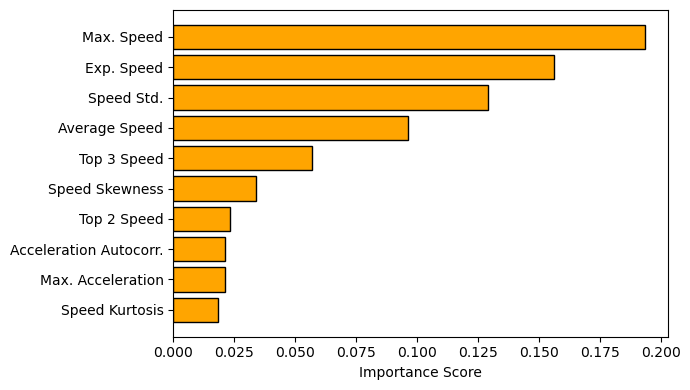

In [39]:
top_10 = feature_importance.sort_values('importance_mean', ascending=False).head(10)
top_10 = top_10.sort_values('importance_mean', ascending=True)

# Create a dictionary of custom labels (feature_name_in_data: "Pretty Label")
custom_labels = {
    'top_1_speed': 'Max. Speed',
    'speed_std': 'Speed Std.',
    'expected_speed': 'Exp. Speed',
    'mean_speed': 'Average Speed',
    'trajectory_length': 'Segment length',
    'total_distance': 'Total distance',
    'jerk_std': 'Jerk Std.',
    'acceleration_std': 'Acceleration Std.',
    'acceleration_kurtosis': 'Acceleration Kurtosis',
    'speed_skewness': 'Speed Skewness',
    'top_3_speed': 'Top 3 Speed',
    'top_2_speed': 'Top 2 Speed',
    'acc_autocorr': 'Acceleration Autocorr.',
    'top_1_acceleration': 'Max. Acceleration',
    'speed_kurtosis': 'Speed Kurtosis',
}

# Apply custom labels (fall back to original if not in dict)
top_10['pretty_label'] = top_10['feature'].map(lambda x: custom_labels.get(x, x))

# Plot
plt.figure(figsize=(7, 4))
plt.barh(
    top_10['pretty_label'],
    top_10['importance_mean'],
    color='orange',
    edgecolor='black'
)

plt.xlabel('Importance Score')
plt.title('')
plt.tight_layout()
plt.show()


# Smaller number of Features

In [ ]:
# Separate features and labels
X = feature_df[['top_1_speed','expected_speed', 'speed_std','mean_speed', 'top_3_speed','speed_skewness','acc_autocorr','top_2_speed','top_1_acceleration','top_3_acceleration','top_2_jerk','HCR','speed_kurtosis','acceleration_std', 'jerk_std','acc_skewness']]  # Features
y = feature_df['label']               # Target

# Encode labels (if they are strings)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=36
)

# Standardize features (critical for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

# Initialize SVM classifier
svm = SVC(
    kernel='rbf',    # Radial Basis Function kernel
    C=1.0,           # Regularization parameter
    gamma='scale',   
    probability=True 
)

# Train the model
svm.fit(X_train_scaled, y_train)


# Predictions
y_pred = svm.predict(X_test_scaled)

# Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

        bike       0.88      0.81      0.85       356
         bus       0.78      0.69      0.73       525
         car       0.79      0.66      0.72       383
       train       0.77      0.63      0.69       230
        walk       0.85      0.99      0.91      1148

    accuracy                           0.83      2642
   macro avg       0.81      0.75      0.78      2642
weighted avg       0.82      0.83      0.82      2642



In [ ]:
# Initialize SVM and GridSearchCV
svm = SVC()
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',  # Use 'f1_weighted' for imbalanced classes
    cv=3,                # 5-fold cross-validation
    n_jobs=-1            # Use all CPU cores
)

# Run grid search on scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

print("Best parameters:", best_params)

Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [111]:
# Predict using the best model
y_pred = best_svm.predict(X_test_scaled)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.83
              precision    recall  f1-score   support

        bike       0.88      0.83      0.85       356
         bus       0.81      0.68      0.74       525
         car       0.77      0.69      0.73       383
       train       0.79      0.64      0.71       230
        walk       0.85      0.99      0.92      1148

    accuracy                           0.83      2642
   macro avg       0.82      0.77      0.79      2642
weighted avg       0.83      0.83      0.83      2642

